# Importing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

In [2]:
current_directory = os.getcwd()
raw_data_directory = current_directory + '/raw_data'
raw_data_directory

'/Users/miguel/repos/Prediction_Medicine_Selectivity_Scores/raw_data'

In [3]:
# lo del df_name no tiene sentido si luego no lo puedo llamar

In [4]:
# input raw data from different years (2010-2021)
initial_year = 2010
last_year = 2021
next_year = initial_year + 1
num_years = last_year - initial_year + 1
list_of_dfs = []
list_of_directories = []
# format example: df_2010_2011 = pd.read_csv(raw_data_directory + '/Notas de corte de Medicina 2010_2011 - Hoja 1.csv', decimal = ',')

for i in range(num_years):
    df_name = 'df' + '_' + str(initial_year) + '_' + str(next_year)
    directory = raw_data_directory + '/Notas de corte de Medicina ' + str(initial_year) + '_' + str(next_year) + ' - Hoja 1.csv'
    list_of_dfs.append(df_name)
    list_of_directories.append(directory)
    
    list_of_dfs[i] = pd.read_csv(list_of_directories[i], decimal = ',')
    
    initial_year += 1
    next_year += 1

In [5]:
# before appending all dfs, we create a column with the year, to keep track of which df the data is coming from
initial_year = 2010

for i in range(num_years):
    list_of_dfs[i]['year'] = initial_year + i

In [6]:
dfs_unified = pd.DataFrame()

In [7]:
for i in range(num_years):
    dfs_unified = dfs_unified.append(list_of_dfs[i])

/var/folders/jn/w0r35k4x0dg_3cvcygm52fz40000gn/T/ipykernel_90996/1492659964.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs_unified = dfs_unified.append(list_of_dfs[i])
/var/folders/jn/w0r35k4x0dg_3cvcygm52fz40000gn/T/ipykernel_90996/1492659964.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs_unified = dfs_unified.append(list_of_dfs[i])
/var/folders/jn/w0r35k4x0dg_3cvcygm52fz40000gn/T/ipykernel_90996/1492659964.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs_unified = dfs_unified.append(list_of_dfs[i])
/var/folders/jn/w0r35k4x0dg_3cvcygm52fz40000gn/T/ipykernel_90996/1492659964.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [8]:
# check the append has been done correctly: check the number of rows is the sum of all of the dfs

total_number_of_rows = 0

for i in range(num_years):
    total_number_of_rows = total_number_of_rows + len(list_of_dfs[i])

if total_number_of_rows != dfs_unified.shape[0]:
    sys.exit()
else:
    print('append has been done correctly')

append has been done correctly


In [9]:
dfs_unified.describe()

,Nota de corte final de Medicina,1ª Lista,Sobre 10,Sobre 10.1,3ª Lista,Sobre 10.2,4ª Lista,Sobre 10.3,5ª Lista,Sobre 10.4,...,year,Nota de corte final,Nota de corte actual,19ª Lista,20ª Lista,21ª Lista,Sobre 10.20,22ª Lista,23ª Lista,Sobre 10.22
count,31.000000,408.000000,394.000000,391.000000,385.000000,379.000000,366.000000,362.000000,333.000000,331.000000,...,421.000000,32.000000,353.000000,7.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
mean,11.490484,12.447645,9.041056,8.944463,12.367694,8.900691,12.356454,8.872387,12.356586,8.850885,...,2015.641330,11.870656,12.063295,12.185857,12.518000,12.512333,8.937333,12.505333,12.636000,9.026000
std,0.284092,1.666311,0.290084,0.309839,1.166845,0.316444,1.010194,0.324101,0.813597,0.331569,...,3.467139,0.304269,2.259171,0.376413,0.346221,0.347917,0.248323,0.353030,0.376181,0.268701
min,11.040000,0.201000,8.279000,8.043000,0.175000,8.035000,0.173000,8.007000,0.203000,7.886000,...,2010.000000,11.260000,0.014000,11.852000,12.258000,12.250000,8.750000,12.236000,12.370000,8.836000
25%,11.233000,12.365750,8.841000,8.737000,12.178000,8.700000,12.148000,8.679250,12.133000,8.669500,...,2013.000000,11.693500,12.178000,11.927500,12.321500,12.315000,8.796500,12.305500,12.503000,8.931000
50%,11.496000,12.637500,9.028500,8.952000,12.480000,8.916000,12.444500,8.889000,12.424000,8.874000,...,2016.000000,11.942500,12.449000,12.028000,12.385000,12.380000,8.843000,12.375000,12.636000,9.026000
75%,11.673000,12.909000,9.227000,9.127000,12.723000,9.088500,12.693000,9.066250,12.667000,9.047000,...,2019.000000,12.046000,12.709000,12.325500,12.648000,12.643500,9.031000,12.640000,12.769000,9.121000
max,12.088000,13.580000,9.700000,9.639000,13.450000,9.607000,13.440000,9.600000,13.428000,9.591000,...,2021.000000,12.360000,13.426000,12.915000,12.911000,12.907000,9.219000,12.905000,12.902000,9.216000


# Data Cleaning

## Check for duplicates

In [10]:
if dfs_unified[dfs_unified.duplicated() == True].shape[0] != 0:
    dfs_unified.drop_duplicates()
else:
    print('There are no duplicates')

There are no duplicates


## Create new unique columns out of data that we already had

In [11]:
def drop_columns_containing_text(df, text):
    '''
    drop columns that contain a certain string/text
    '''
    df = df[df.columns.drop(list(df.filter(regex=text)))]
    return df

In [12]:
dfs_unified = drop_columns_containing_text(dfs_unified, 'Sobre')

In [13]:
# to keep track of raw columns, to afterwards drop them
dfs_unified_raw_columns = dfs_unified.columns.tolist()
# 'year' was created before and is not a raw column
dfs_unified_raw_columns.remove('year')
#dfs_unified_columns

In [14]:
# tiene sentido copiar solo not null data y no toda????????

In [15]:
def copy_data(new_col, old_col):
    '''
    copy not null data from one column to another
    '''
    dfs_unified[new_col] = np.where(dfs_unified[old_col].notnull(), dfs_unified[old_col], dfs_unified[new_col])

In [16]:
dfs_unified['university'] = ''
copy_data('university', 'Notas de corte de Medicina')
copy_data('university', 'Universidad')
copy_data('university', 'Facultad de Medicina')

#dfs_unified['date_last_admission'] = ''
#copy_data('date_last_admission', 'Fecha de última admisión')
#copy_data('date_last_admission', 'Última fecha de admisión \n(Fecha de la nota final)')
dfs_unified['1_list'] = ''
copy_data('1_list', '1ª Lista')

dfs_unified['final_grade'] = ''
copy_data('final_grade', 'Nota de corte final de Medicina')
copy_data('final_grade', 'Nota de corte final')
copy_data('final_grade', 'Nota de corte actual')



#copy_data('19_list', '19ª lista')
#copy_data('20_list', '20ª lista')

In [17]:
# drop all old columns
dfs_unified = dfs_unified.drop(dfs_unified_raw_columns, axis=1)

# reset index
#dfs_unified = dfs_unified.reset_index()

In [18]:
dfs_unified[~dfs_unified['university'].str.contains('U', na=False)]

,year,university,1_list,final_grade
31,2010,,,
33,2010,"** Publicada nota de 11,257 en la CiuG, el 7/9/10",,
32,2012,Nota promedio,,12.017
33,2012,Desviación típica,,0.22
32,2013,Nota promedio,,12.082
33,2013,Desviación típica,,0.213
32,2014,Nota promedio,,12.268
33,2014,Desviación típica,,0.213
32,2015,Nota promedio,12.605,12.422
33,2015,Desviación típica,0.201,0.188


In [19]:
dfs_unified = dfs_unified[dfs_unified['university'].str.contains('U', na=False)]

In [20]:
dfs_unified = dfs_unified[~dfs_unified['university'].str.contains('Sobre la Universidad de Santiago:', na=False)]

In [21]:
dfs_unified.columns

Index(['year', 'university', '1_list', 'final_grade'], dtype='object')

In [22]:
dfs_unified_columns = dfs_unified.columns.tolist()[1:]

num_columns = len(dfs_unified_columns)

for i in range(num_columns):
    dfs_unified[dfs_unified_columns[i]].replace({'': np.nan}, inplace=True)

## Check for nulls

In [23]:
# quality check: nulls

nulls_1_list = dfs_unified[dfs_unified['1_list'].isnull()].shape[0]
nulls_final_grade = dfs_unified[dfs_unified['final_grade'].isnull()].shape[0]
nulls_university = dfs_unified[dfs_unified['university'].isnull()].shape[0]

if nulls_1_list or nulls_final_grade or nulls_university != 0:
    sys.exit()
else:
    print('column 1_list has', nulls_1_list, 'null rows')
    print('column final_grade has', nulls_final_grade, 'null rows')
    print('column university has', nulls_university, 'null rows')

column 1_list has 0 null rows
column final_grade has 0 null rows
column university has 0 null rows


## Create consistent University names across years

In [24]:
dfs_unified['university'] = dfs_unified['university'].str.lower()

In [25]:
last_year = 2021
dfs_unified[dfs_unified['year'] == last_year]['university'].values

array(['universidad complutense de madrid', 'universidad de sevilla',
       'universidad de murcia', 'universidad de granada',
       'u. autónoma de madrid', 'universidad de málaga',
       'universidad de córdoba', 'universidad de cádiz',
       'u. miguel hernández (s. juan de alicante)',
       'u. de c-la mancha (campus c.real)', 'universidad de alcalá',
       'universidad de valladolid', 'urjc - campus alcorcón',
       'u. de c-la mancha (campus albacete)',
       'u. de extremadura (badajoz)', 'universidad pública de navarra',
       'universidad de valencia', 'universidad jaume i',
       'u. de zaragoza (campus zaragoza)',
       'universidad de barcelona-clínico', 'universidad de la laguna',
       'universidad de las palmas', 'universidad de salamanca',
       'u. de zaragoza (campus huesca)', 'u. de santiago de compostela',
       'universidad de oviedo', 'u. de cantabria (santander)',
       'universidad de barcelona-bellvitge',
       'universidad del país vasco (lejon

In [26]:
list_of_uni_names_2021 = dfs_unified[dfs_unified['year'] == last_year]['university'].tolist()
num_of_uni_names_2021 = len(list_of_uni_names_2021)
print('There are', num_of_uni_names_2021, 'universities in 2021')

dfs_unified_list_uni = list(dfs_unified['university'].unique())
num_of_uni_names_dataset = len(dfs_unified_list_uni)
print('There are a total of', num_of_uni_names_dataset, 'universities in our dataset')

diff_uni_names = num_of_uni_names_dataset - num_of_uni_names_2021
print('This means there are a total of', diff_uni_names, 'universities that have a different name than the ones in our 2021 data, and need to be mapped')

There are 35 universities in 2021
There are a total of 48 universities in our dataset
This means there are a total of 13 universities that have a different name than the ones in our 2021 data, and need to be mapped


In [27]:
# we create a list with the universities that have different name

list_not_matched = []

for i in dfs_unified_list_uni:
    if i not in list_of_uni_names_2021:
        list_not_matched.append(i)
    else:
        continue


if len(list_not_matched) != diff_uni_names:
    sys.exit()
else:
    print('list of not matched created successfully')

list_not_matched

list of not matched created successfully


['universidad de zaragoza - campus de huesca',
 'universidad de cantabria (santander)',
 'universidad de santiago de compostela',
 'universidad de extremadura (badajoz)',
 'universidad pompeu fabra (barcelona)',
 'universidad de barcelona',
 'universidad de zaragoza - campus de zaragoza',
 'universidad de clm- campus de ciudad real',
 'universidad de clm- campus de albacete',
 'universidad miguel hernández (san juan de alicante)',
 'universidad rey juan carlos - campus de alcorcón',
 'universidad autónoma de madrid',
 'universidad de jaume i']

### Sequence Matcher

In [28]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [29]:
df1 = pd.DataFrame({
    "not_matched_uni": list_not_matched
})

df2 = pd.DataFrame({
    "list_of_uni_names_2021": list_of_uni_names_2021
})

df3 = pd.MultiIndex.from_product(
    [df1["not_matched_uni"], df2["list_of_uni_names_2021"]], names=["not_matched_uni", "list_of_uni_names_2021"]
).to_frame(index=False)

In [30]:
df3['ratio'] = ''

for i in range(len(df3['not_matched_uni'])):
    df3['ratio'][i] = similar(df3['not_matched_uni'][i], df3['list_of_uni_names_2021'][i])

df3['not_matched_uni'].nunique()

13

In [31]:
df4 = df3.groupby('not_matched_uni')['ratio'].max().reset_index()

df5 = pd.merge(df4,df3,on='not_matched_uni',how='left')
df5 = df5[df5['ratio_x'] == df5['ratio_y']]
df5

,not_matched_uni,ratio_x,list_of_uni_names_2021,ratio_y
31,universidad autónoma de madrid,0.825397,universidad autónoma de barcelona,0.825397
54,universidad de barcelona,0.857143,universidad de barcelona-clínico,0.857143
96,universidad de cantabria (santander),0.825397,u. de cantabria (santander),0.825397
134,universidad de clm- campus de albacete,0.676056,universidad de las islas baleares,0.676056
140,universidad de clm- campus de ciudad real,0.648649,universidad complutense de madrid,0.648649
189,universidad de extremadura (badajoz),0.825397,u. de extremadura (badajoz),0.825397
227,universidad de jaume i,0.926829,universidad jaume i,0.926829
269,universidad de santiago de compostela,0.830769,u. de santiago de compostela,0.830769
303,universidad de zaragoza - campus de huesca,0.750000,u. de zaragoza (campus huesca),0.75
333,universidad de zaragoza - campus de zaragoza,0.763158,u. de zaragoza (campus zaragoza),0.763158


In [32]:
# hacerlo con str.contains, crear funcion

In [33]:
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de cantabria (santander)'), 'u. de cantabria (santander)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de extremadura (badajoz)'), 'u. de extremadura (badajoz)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de jaume i'), 'universidad jaume i', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de zaragoza - campus de huesca'), 'u. de zaragoza (campus huesca)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de santiago de compostela'), 'u. de santiago de compostela', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de zaragoza - campus de zaragoza'), 'u. de zaragoza (campus zaragoza)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad miguel hernández (san juan de alicante)'), 'u. miguel hernández (s. juan de alicante)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad pompeu fabra (barcelona)'), 'u. pompeu fabra (barcelona)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de santiago de compostela'), 'u. de santiago de compostela', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad rey juan carlos - campus de alcorcón'), 'urjc - campus alcorcón', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad autónoma de madrid'), 'u. autónoma de madrid', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de barcelona'), 'universidad de barcelona-clínico', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de clm- campus de albacete'), 'u. de c-la mancha (campus albacete)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de clm- campus de ciudad real'), 'u. de c-la mancha (campus c.real)', dfs_unified['university'])

In [34]:
# quality check: make sure all university names are mapped with 2021 names

dfs_unified_list_uni = list(dfs_unified['university'].unique())

list_not_matched = []

for i in dfs_unified_list_uni:
    if i not in list_of_uni_names_2021:
        list_not_matched.append(i)
    else:
        continue

# checking length of not matched
if len(list_not_matched) != 0:
    sys.exit()
else:
    print('all university names are consistent with 2021')

# another way of checking this could be by analyzing the overall length and unique names
if dfs_unified['university'].nunique() != len(list_of_uni_names_2021):
    sys.exit()
else:
    print('all university names are consistent with 2021')

all university names are consistent with 2021
all university names are consistent with 2021


### Check if all of the universities have been delivering Medicine career since 2010

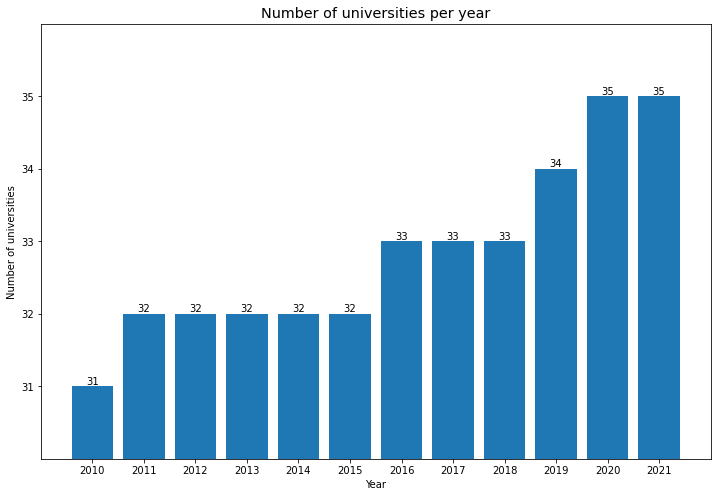

In [35]:
# check how many universities there are per year
uni_year_grouped = dfs_unified.groupby(['year'])['university'].count().reset_index()

fig,ax=plt.subplots(figsize=(12,8))
bars = ax.bar(uni_year_grouped['year'], uni_year_grouped['university'])
# show number on top of bars
ax.bar_label(bars)
# style
plt.style.use('ggplot')
# title and axis
plt.xticks(range(min(uni_year_grouped['year']), max(uni_year_grouped['year']) + 1))
plt.yticks(range(min(uni_year_grouped['university']), max(uni_year_grouped['university']) + 1))
plt.axis([2009, 2022, 30, 36])
plt.title('Number of universities per year')
plt.xlabel('Year')
plt.ylabel('Number of universities')

plt.show()

In [36]:
# seems like there are 4 universities that haven't been delivering the Medicine career since 2010, let's check which ones they are
bool_2010 = {'since_2010': dfs_unified.groupby('university')['university'].count() == 12}
bool_2010_df = pd.DataFrame(bool_2010, columns=['since_2010'])
bool_2010_df[bool_2010_df['since_2010'] == False]

,since_2010
university,
universidad de barcelona-bellvitge,False
universidad de las islas baleares,False
universidad jaume i,False
universidad pública de navarra,False


In [37]:
year_uni_bb = dfs_unified[dfs_unified['university'] == 'universidad de barcelona-bellvitge']['year'].min()
year_uni_ib = dfs_unified[dfs_unified['university'] == 'universidad de las islas baleares']['year'].min()
year_uni_ji = dfs_unified[dfs_unified['university'] == 'universidad jaume i']['year'].min()
year_uni_pn = dfs_unified[dfs_unified['university'] == 'universidad pública de navarra']['year'].min()

In [38]:
# we create a function tso that we can apply it later to the predicted 2022 data
def since_2010():
    dfs_unified['since_2010'] = ''
    dfs_unified['since_2010'] = np.where(dfs_unified['university'] == 'universidad de barcelona-bellvitge', year_uni_bb, dfs_unified['since_2010'])
    dfs_unified['since_2010'] = np.where(dfs_unified['university'] == 'universidad de las islas baleares', year_uni_ib, dfs_unified['since_2010'])
    dfs_unified['since_2010'] = np.where(dfs_unified['university'] == 'universidad jaume i', year_uni_ji, dfs_unified['since_2010'])
    dfs_unified['since_2010'] = np.where(dfs_unified['university'] == 'universidad pública de navarra', year_uni_pn, dfs_unified['since_2010'])
    dfs_unified['since_2010'] = np.where(dfs_unified['since_2010'] == '', True, dfs_unified['since_2010'])

In [39]:
since_2010()

In [40]:
dfs_unified['since_2010'].nunique()

5

In [41]:
dfs_unified[dfs_unified['since_2010'] != True]

,year,university,1_list,final_grade,since_2010
10,2011,universidad jaume i,12.332,11.730,2011
12,2012,universidad jaume i,12.440,11.944,2011
10,2013,universidad jaume i,12.334,11.931,2011
11,2014,universidad jaume i,12.422,12.118,2011
9,2015,universidad jaume i,12.574,12.320,2011
1,2016,universidad de las islas baleares,12.534,12.144,2016
12,2016,universidad jaume i,12.754,12.376,2011
2,2017,universidad de las islas baleares,12.744,12.112,2016
18,2017,universidad jaume i,12.780,12.464,2011
0,2018,universidad de las islas baleares,12.568,12.120,2016


## Convert columns with numbers to floats

In [42]:
# to convert to float, we can't have commas or spaces, as this function '.astype(float)' will give back an error

In [43]:
# float to 2 decimals?? some have 3

In [44]:
#dfs_unified['1_list'] = dfs_unified['1_list'].astype(float)

# Feature Engineering

## Create City and CCAA columns

### City

In [45]:
# first: bigger cities in case two names appear
list_of_cities = ['madrid', 'zaragoza', 'barcelona', 'sevilla', 'valencia', 'murcia', 'granada','málaga', 'córdoba', 'cádiz', 'alicante', 'albacete', \
    'valladolid', 'badajoz', 'gerona', 'lérida', 'reus', 'navarra', 'santander', 'oviedo', \
    'santiago de compostela', 'salamanca', 'bilbao', 'salamanca', 'navarra', 'las palmas', 'la laguna', 'alcalá', 'ciudad real', 'huesca']

In [46]:
num_cities = len(list_of_cities)

In [47]:
# we create a function so that we can apply it later to the predicted 2022 data

def city():
    i=0
    dfs_unified['city'] = ''
    while i < num_cities:
        dfs_unified['city'] = np.where(dfs_unified['university'].str.contains(list_of_cities[i], na=False), list_of_cities[i], dfs_unified['city'])
        i +=1
    
    dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('país vasco', na=False), 'bilbao', dfs_unified['city'])
    dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('alcorcón', na=False), 'madrid', dfs_unified['city'])
    dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('c.real', na=False), 'ciudad real', dfs_unified['city'])
    dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('jaume', na=False), 'castellon de la plana', dfs_unified['city'])
    dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('islas baleares', na=False), 'palma de mallorca', dfs_unified['city'])

    num_columns = len(dfs_unified_columns)

    while i < num_columns:
        dfs_unified[dfs_unified_columns[i]].replace({'': np.nan}, inplace=True)
        i += 1

In [48]:
city()

In [49]:
dfs_unified[dfs_unified['city'].isnull()]

,year,university,1_list,final_grade,since_2010,city


### CCAA - Communities of Spain

In [50]:
# CCAA - communities
def CCAA():
    dfs_unified['CCAA'] = ''
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['huesca', 'zaragoza']), 'Aragón', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['lérida', 'gerona', 'reus', 'barcelona']), 'Cataluña', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['madrid', 'alcalá']), 'C. Madrid', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['valladolid', 'salamanca']), 'Castilla y León', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['santander']), 'Cantabria', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['santiago de compostela']), 'Galicia', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['badajoz']), 'Extremadura', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['cádiz', 'córdoba', 'sevilla', 'málaga', 'granada']), 'Andalucía', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['murcia']), 'Murcia', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['ciudad real', 'albacete']), 'Castilla-La Mancha', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['bilbao']), 'País Vasco', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['la laguna', 'las palmas']), 'Canarias', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['valencia', 'castellon de la plana', 'alicante']), 'C. Valenciana', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['oviedo']), 'Asturias', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['palma de mallorca']), 'Islas Baleares', dfs_unified['CCAA'])
    dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['navarra']), 'Navarra', dfs_unified['CCAA'])

In [51]:
CCAA()

In [52]:
dfs_unified[dfs_unified['CCAA'] == '']

,year,university,1_list,final_grade,since_2010,city,CCAA


In [53]:
dfs_unified['CCAA'].unique()

array(['Cataluña', 'Aragón', 'Castilla y León', 'Cantabria', 'Galicia',
       'Extremadura', 'Andalucía', 'Castilla-La Mancha', 'País Vasco',
       'C. Valenciana', 'C. Madrid', 'Murcia', 'Canarias', 'Asturias',
       'Islas Baleares', 'Navarra'], dtype=object)

In [54]:
# CCAA table for streamlit visualization
# df_CCAA = dfs_unified.groupby('CCAA')['final_grade'].mean().reset_index()
# df_CCAA

## Covid format change: change in test format due to covid

In [55]:
# change in test format due to covid

def covid_format_change():
    dfs_unified['covid_format_change'] = ''
    dfs_unified['covid_format_change'] = np.where((dfs_unified['year'] >= 2020), float(1), dfs_unified['covid_format_change'])
    dfs_unified['covid_format_change'] = np.where((dfs_unified['year'] < 2020), float(0), dfs_unified['covid_format_change'])

In [56]:
covid_format_change()

## Difference of 1_list and final_grade scores between years

In [57]:
def diff_between_years(field_name, convocatory):
    dfs_unified[field_name] = ''

    # year 2010 (initial year)
    for uni in list_of_uni_names_2021:
        dfs_unified[field_name] = np.where((dfs_unified['university'] == uni) & (dfs_unified['year'] == 2010), np.nan, dfs_unified[field_name])
    # rest of years
    for uni in list_of_uni_names_2021:
        for year in range(2011, 2023):
            try:
                dfs_unified[field_name] = np.where((dfs_unified['university'] == uni) & (dfs_unified['year'] == year), float((dfs_unified[(dfs_unified['university'] == uni) & (dfs_unified['year'] == year)][convocatory]).values[0] - (dfs_unified[(dfs_unified['university'] == uni) & (dfs_unified['year'] == year - 1)][convocatory]).values[0]), dfs_unified[field_name])
            except:
                pass

    # for the 4 universities that don't have data since 2010
    dfs_unified[field_name].replace({'': np.nan}, inplace=True)

In [58]:
diff_between_years('diff_1_list', '1_list')

In [59]:
diff_between_years('diff_final_grade', 'final_grade')

## Decreased value between 1_list and final_grade

In [60]:
# decresead value from 1_list to final grade
def diff_1_list_final_grade():
    dfs_unified['diff_1_list_final_grade'] = dfs_unified['1_list'] - dfs_unified['final_grade']

In [61]:
diff_1_list_final_grade()

## Round columns above to 3 decimals

In [62]:
# round numbers to 3 decimals
def round_to_3():
    dfs_unified['1_list'] = dfs_unified['1_list'].apply(lambda x: round(x, 3))
    dfs_unified['final_grade'] = dfs_unified['final_grade'].apply(lambda x: round(x, 3))
    dfs_unified['diff_final_grade'] = dfs_unified['diff_final_grade'].apply(lambda x: round(x, 3))
    dfs_unified['diff_1_list'] = dfs_unified['diff_1_list'].apply(lambda x: round(x, 3))
    dfs_unified['diff_1_list_final_grade'] = dfs_unified['diff_1_list_final_grade'].apply(lambda x: round(x, 3))

In [63]:
round_to_3()

## Shorter name of universities

In [64]:
dfs_unified['university'] = dfs_unified['university'].replace('universidad', 'u.', regex=True)
list_of_uni_names_2021  = dfs_unified[dfs_unified['year'] == last_year]['university'].tolist()

## Latitude and Longitude of Universities for map on Streamlit

In [65]:
#https://www.mapcoordinates.net/es

def latitude():
    dfs_unified['latitude'] = ''
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. autónoma de barcelona', 41.5025932, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de lérida', 41.81636125, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de gerona', 41.9743792, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. rovira i virgili (reus)', 41.155309, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de zaragoza (campus huesca)', 42.1414059, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de valladolid', 41.6105937, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de cantabria (santander)', 43.4736983, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de santiago de compostela', 42.88050025, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de extremadura (badajoz)', 38.8824069, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de cádiz', 36.5340199, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. pompeu fabra (barcelona)', 41.37921475, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de barcelona-clínico', 41.39017434, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de salamanca', 40.9666432, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de zaragoza (campus zaragoza)', 41.6421312, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de c-la mancha (campus c.real)', 38.9918372, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de córdoba', 37.8560421, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. del país vasco (lejona)', 43.3359821, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de c-la mancha (campus albacete)', 38.4527362, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de sevilla', 37.4128557, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. miguel hernández (s. juan de alicante)', 38.39896277, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de alcalá', 40.4818396, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de málaga', 36.7200431, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de murcia', 37.99109245, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de la laguna', 28.4852475, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'urjc - campus alcorcón', 40.3506324, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de valencia', 39.4786642, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. autónoma de madrid', 40.4832261, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de las palmas', 28.09055808, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de granada', 37.1474408, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. complutense de madrid', 40.4437398, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de oviedo', 43.3533657, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. jaume i', 39.9899483, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de las islas baleares', 39.60701435, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. pública de navarra', 42.8154264, dfs_unified['latitude'])
    dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de barcelona-bellvitge', 41.3507816, dfs_unified['latitude'])

In [66]:
def longitude():
    dfs_unified['longitude'] = ''
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. autónoma de barcelona', 2.080056, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de lérida', 1.59713745, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de gerona', 2.8235429, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. rovira i virgili (reus)', 1.1053273, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de zaragoza (campus huesca)', -0.4060896, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de valladolid', -4.6916619, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de cantabria (santander)', -3.7859174, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de santiago de compostela', -8.5457602, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de extremadura (badajoz)', -7.0194457, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de cádiz', -6.3018987, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. pompeu fabra (barcelona)', 2.17941527, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de barcelona-clínico', 2.15212588, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de salamanca', -5.6772757, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de zaragoza (campus zaragoza)', -0.90302271, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de c-la mancha (campus c.real)', -3.9268263, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de córdoba', -4.8134452, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. del país vasco (lejona)', -2.9768285, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de c-la mancha (campus albacete)', -2.05363374, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de sevilla', -5.9845606, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. miguel hernández (s. juan de alicante)', -0.43477806, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de alcalá', -3.3644973, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de málaga', -4.41617939, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de murcia', -1.13010405, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de la laguna', -16.3126059, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'urjc - campus alcorcón', -3.8437926, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de valencia', -0.3627246, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. autónoma de madrid', -3.6972262, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de las palmas', -15.41890014, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de granada', -3.6042349, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. complutense de madrid', -3.72614639, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de oviedo', -5.8687712, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. jaume i', -0.0664218, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de las islas baleares', 2.64475448, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. pública de navarra', -1.65263107, dfs_unified['longitude'])
    dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de barcelona-bellvitge', 2.1045067, dfs_unified['longitude'])

In [67]:
latitude()
longitude()

In [68]:
dfs_unified.head()

,year,university,1_list,final_grade,since_2010,city,CCAA,covid_format_change,diff_1_list,diff_final_grade,diff_1_list_final_grade,latitude,longitude
0,2010,u. de lérida,11.654,11.040,True,lérida,Cataluña,0.0,NaN,NaN,0.614,41.816361,1.597137
1,2010,u. de gerona,11.610,11.070,True,gerona,Cataluña,0.0,NaN,NaN,0.540,41.974379,2.823543
2,2010,u. rovira i virgili (reus),11.708,11.142,True,reus,Cataluña,0.0,NaN,NaN,0.566,41.155309,1.105327
3,2010,u. de zaragoza (campus huesca),12.059,11.190,True,huesca,Aragón,0.0,NaN,NaN,0.869,42.141406,-0.40609
4,2010,u. autónoma de barcelona,11.590,11.195,True,barcelona,Cataluña,0.0,NaN,NaN,0.395,41.502593,2.080056


In [69]:
dfs_unified[dfs_unified['latitude'] == '']

,year,university,1_list,final_grade,since_2010,city,CCAA,covid_format_change,diff_1_list,diff_final_grade,diff_1_list_final_grade,latitude,longitude


In [70]:
dfs_unified[dfs_unified['longitude'] == '']

,year,university,1_list,final_grade,since_2010,city,CCAA,covid_format_change,diff_1_list,diff_final_grade,diff_1_list_final_grade,latitude,longitude


In [ ]:
dfs_unified[dfs_unified['latitude'].isnull()]

In [71]:
dfs_unified[dfs_unified['longitude'].isnull()]

,year,university,1_list,final_grade,since_2010,city,CCAA,covid_format_change,diff_1_list,diff_final_grade,diff_1_list_final_grade,latitude,longitude


# Model

In [ ]:
dfs_unified.head()

In [72]:
dfs_unified_columns

['university', '1_list', 'final_grade']

In [73]:
dfs_unified_columns = dfs_unified.columns.tolist()[1:]

num_columns = len(dfs_unified_columns)

for i in range(num_columns):
    dfs_unified[dfs_unified_columns[i]].replace({np.nan: 0}, inplace=True)

In [74]:
#ojo que paso los nan a 0

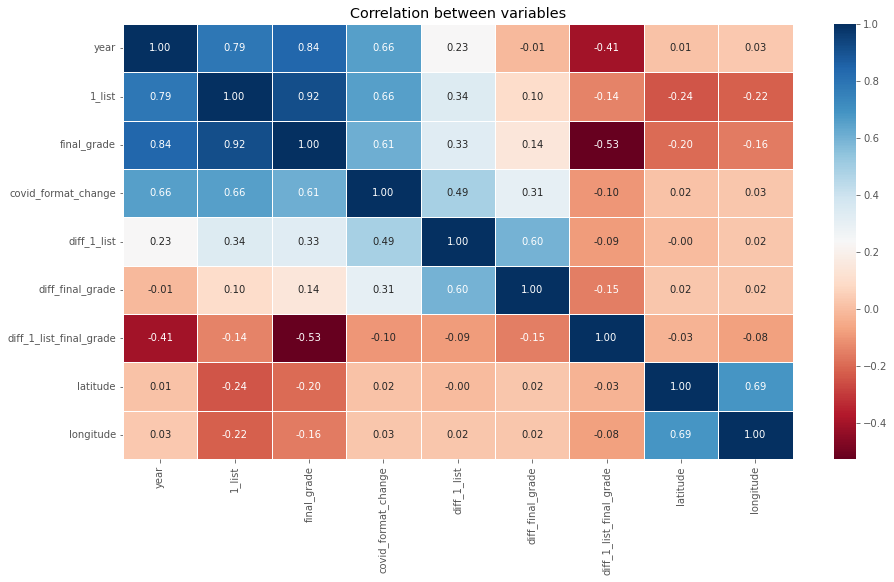

In [75]:
fig, ax = plt.subplots(figsize=(15,8))         # Sample figsize in inches
sns.heatmap(dfs_unified.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax, cmap='RdBu')
plt.title('Correlation between variables');

## Create and evaluate models

As the output variable (1_list) is a number we need to solve a regression problem.

### Linear Regression

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [77]:
def plot_actual_vs_predicted(title_string, subtitle_string, y_test, y_predict):
    # visualize the predicted score as a line on the test set
    plt.figure(figsize=(12,6))
    plt.scatter(dfs_unified[dfs_unified['year'] == 2021]['university'], y_test, color = 'red', label = 'actual')
    plt.plot(dfs_unified[dfs_unified['year'] == 2021]['university'], y_predict, color='g', label = 'predicted')
    plt.xlabel('University', fontsize = 14)
    plt.ylabel('1_list', fontsize = 14)
    plt.xticks(rotation=90)
    plt.suptitle(title_string, y=1.05, fontsize=18)
    plt.title(subtitle_string, fontsize=16)
    plt.legend()
    plt.style.use('ggplot')
    plt.show()

In [78]:
results_models = pd.DataFrame(columns=['model_name_variables', 'MSE', 'RMSE', 'MAE'])

In [79]:
def plot_metrics():
    plt.style.use('ggplot')

    df_MSE = results_models[['MSE']]
    df_RMSE = results_models[['RMSE']]
    df_MAE = results_models[['MAE']]

    # sort values so the best model appears in first position
    df_MSE = df_MSE.sort_values('MSE', ascending=False)
    df_RMSE = df_RMSE.sort_values('RMSE', ascending=False)
    df_MAE = df_MAE.sort_values('MAE', ascending=False)

    # create figure and one axis per metric
    f = plt.figure(figsize=(10,20))
    axes1 = f.add_subplot(4,1,1)
    axes2 = f.add_subplot(4,1,2)
    axes3 = f.add_subplot(4,1,3)
        
    # plot dataframes with DataFrame.plot()
    df_MSE.plot(kind='barh', ax=axes1, color='lightgreen', title = 'Compare Model Metrics')\
            .legend(loc='lower left',bbox_to_anchor=(1.0, 0.5))
    df_RMSE.plot(kind='barh', ax=axes2, color='lightskyblue')\
            .legend(loc='lower left',bbox_to_anchor=(1.0, 0.5))
    df_MAE.plot(kind='barh',ax=axes3, color='salmon')\
            .legend(loc='lower left',bbox_to_anchor=(1.0, 0.5))  
        
    # annotate bars with result values 
    for p in axes1.patches:
            axes1.annotate(np.round(a=p.get_width(), decimals=3), \
                    (p.get_x() + p.get_width(), p.get_y()), \
                    xytext=(-30, 5), textcoords='offset points')

    for p in axes2.patches:
            axes2.annotate(np.round(a=p.get_width(), decimals=3), \
                    (p.get_x() + p.get_width(), p.get_y()), \
                    xytext=(-30, 5), textcoords='offset points')

    for p in axes3.patches:
            axes3.annotate(np.round(a=p.get_width(), decimals=3), \
                    (p.get_x() + p.get_width(), p.get_y()), \
                    xytext=(-30, 5), textcoords='offset points')
    plt.show()

In [80]:
def linear_regression(X_var, model_name_variables):
    lr = LinearRegression()

    X_train = dfs_unified[(dfs_unified['year'] != 2021)][X_var]
    y_train = dfs_unified[(dfs_unified['year'] != 2021)][['1_list']]

    X_test = dfs_unified[(dfs_unified['year'] == 2021)][X_var]
    y_test = dfs_unified[(dfs_unified['year'] == 2021)][['1_list']]

    lr.fit(X_train, y_train)

    y_predict = lr.predict(X_test) # we are predicting the 1_list scores for 2021, for all of the universities (various scores)
    
    #print('test: ', y_test)
    #print('predicted: ', y_predict)
    
    # evaluation
    errors = y_test - y_predict

    # MSE (min squared error)
    mse = float(np.mean(errors ** 2))

    # RMSE (root min squared error)
    rmse = float(np.sqrt(mse))

    # MAE (mean absolute error)
    mae = float(np.mean(np.abs(errors)))
    
    results_models.loc[model_name_variables] = [model_name_variables, mse, rmse, mae]

    plot_actual_vs_predicted('Linear Regression: For 2021, actual 1_list scores vs predicted', f'Variables: {X_var}', y_test, y_predict)

    

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


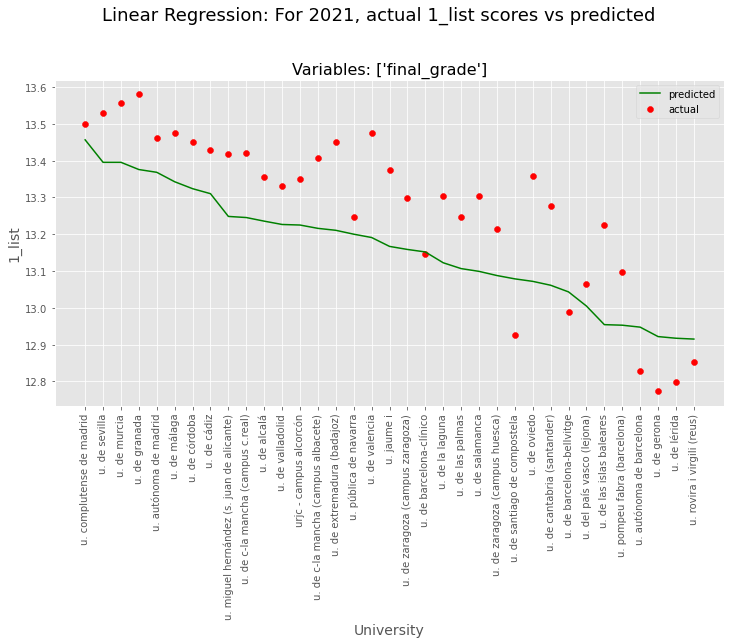

In [81]:
# using only "final_grade" variable

linear_regression(['final_grade'], 'linear_regression_final_grade')

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


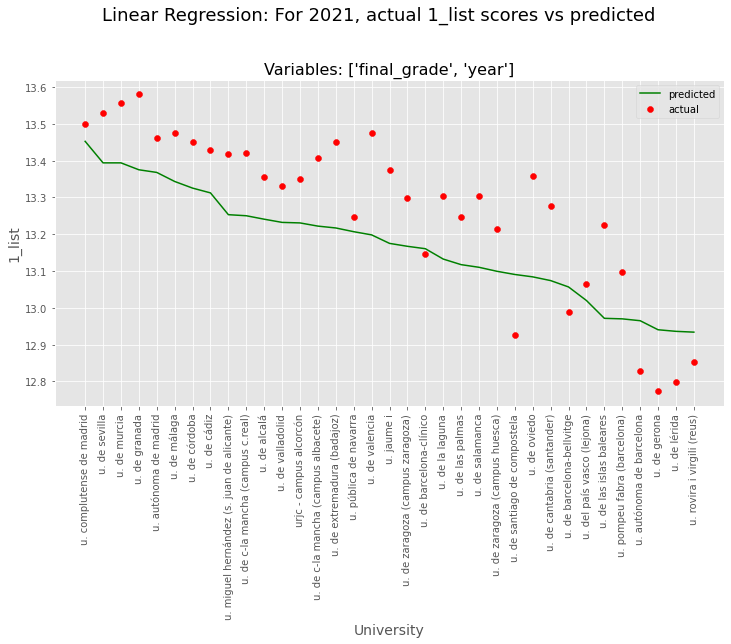

In [82]:
# using "final_grade" and "year" variables
linear_regression(['final_grade', 'year'], 'linear_regression_final_grade_year')

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


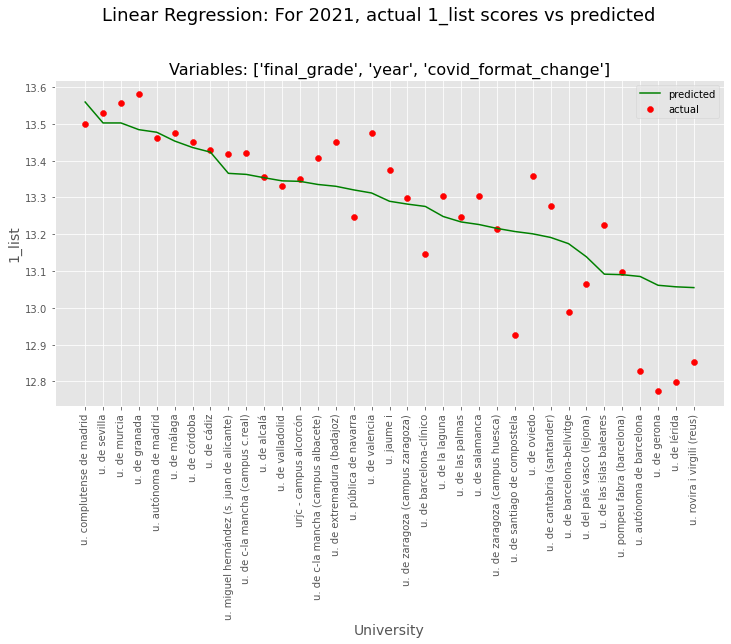

In [83]:
# using "final_grade", "year" and "covid_format_change" variables
linear_regression(['final_grade', 'year', 'covid_format_change'], 'linear_regression_final_grade_year_covid')

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


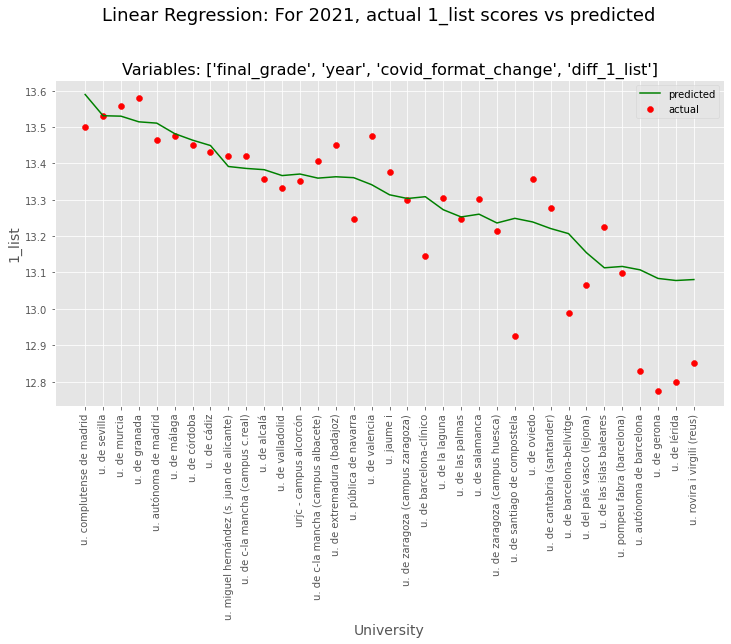

In [84]:
# using "final_grade", "year", "covid_format_change" and "diff_1_list"  variables
linear_regression(['final_grade', 'year', 'covid_format_change', 'diff_1_list'], 'linear_regression_final_grade_year_covid_diff_1_list')

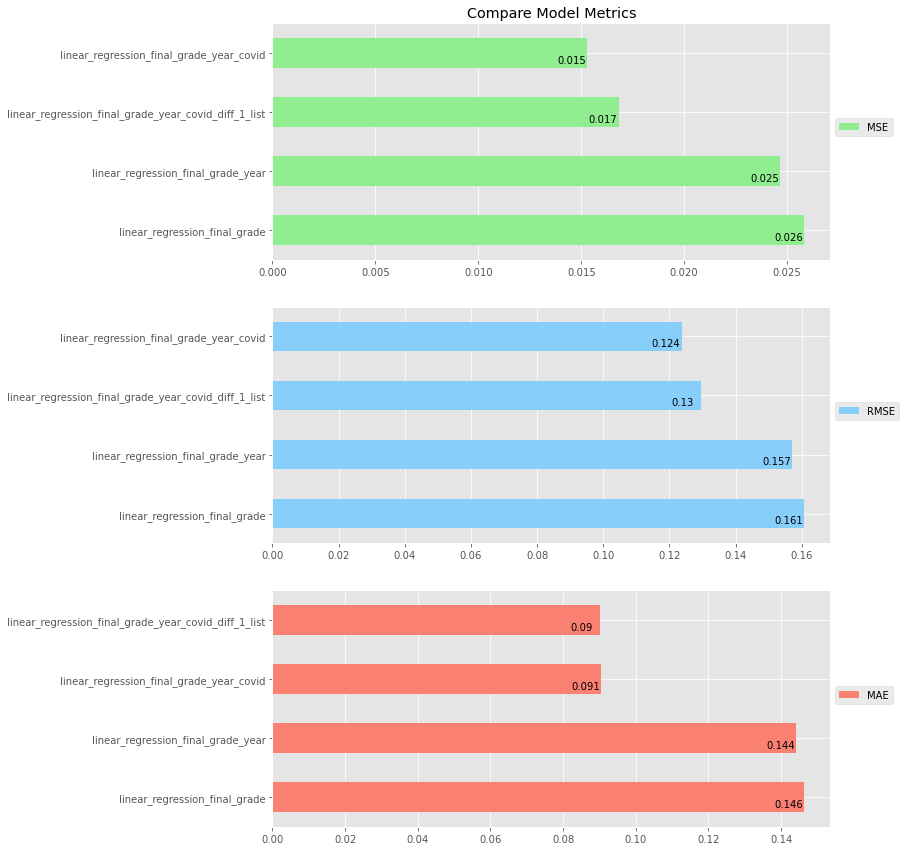

In [85]:
plot_metrics()

### Linear Regression per University

In [86]:
# evaluate models per university
results_models_per_uni = pd.DataFrame(columns=['university','MSE', 'RMSE', 'MAE', 'y_predict', 'y_test'])
results_models_per_uni['university'] = list_of_uni_names_2021

In [87]:
def linear_regression_per_uni(X_var, model_name_variables):
    lr = LinearRegression()
    X_train = dfs_unified[(dfs_unified['university'] == uni) & (dfs_unified['year'] != 2021)][X_var]
    y_train = dfs_unified[(dfs_unified['university'] == uni) & (dfs_unified['year'] != 2021)][['1_list']]

    X_test = dfs_unified[(dfs_unified['university'] == uni) & (dfs_unified['year'] == 2021)][X_var]
    y_test = dfs_unified[(dfs_unified['university'] == uni) & (dfs_unified['year'] == 2021)][['1_list']]

    lr.fit(X_train, y_train)

    y_predict = lr.predict(X_test) # we are predicting the 1_list score from 2021 for a specific university (only 1 score)
    y_predict = float(y_predict)
    y_test = y_test['1_list'].values[0]

    # evaluation
    errors = y_test - y_predict

    # MSE (min squared error)
    mse = np.mean(errors ** 2)

    # RMSE (root min squared error)
    rmse = np.sqrt(mse)

    # MAE (mean absolute error)
    mae = np.mean(np.abs(errors))
    
    results_models_per_uni['MSE'] = np.where(results_models_per_uni['university'] == uni, mse, results_models_per_uni['MSE'])
    results_models_per_uni['RMSE'] = np.where(results_models_per_uni['university'] == uni, rmse, results_models_per_uni['RMSE'])
    results_models_per_uni['MAE'] = np.where(results_models_per_uni['university'] == uni, mae, results_models_per_uni['MAE'])
    results_models_per_uni['y_predict'] = np.where(results_models_per_uni['university'] == uni, y_predict, results_models_per_uni['y_predict'])
    results_models_per_uni['y_test'] = np.where(results_models_per_uni['university'] == uni, y_test, results_models_per_uni['y_test'])

    # we do the average out of all of the universities, to compare against the other models
    results_models.loc[model_name_variables] = [model_name_variables, results_models_per_uni['MSE'].mean(), results_models_per_uni['RMSE'].mean(), results_models_per_uni['MAE'].mean()]

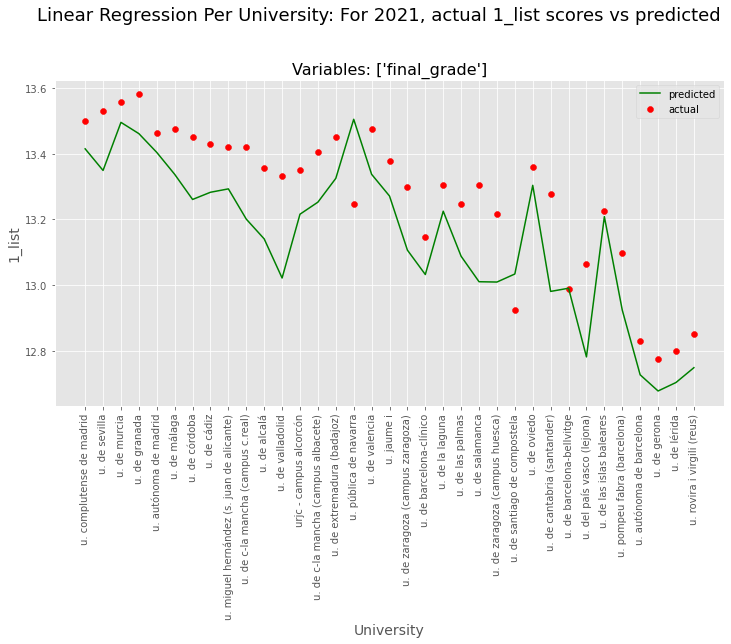

In [88]:
# using only "final_grade" variable

X_var = ['final_grade']

for uni in list_of_uni_names_2021:
    linear_regression_per_uni(X_var, 'linear_regression_per_uni_final_grade')

y_test = results_models_per_uni['y_test']
y_predict = results_models_per_uni['y_predict']

plot_actual_vs_predicted('Linear Regression Per University: For 2021, actual 1_list scores vs predicted', f'Variables: {X_var}', y_test, y_predict)

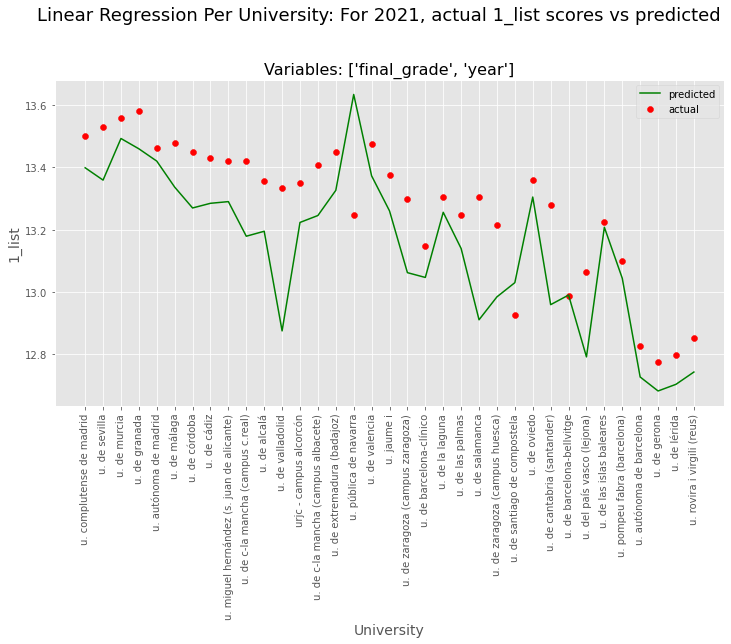

In [89]:
# using "final_grade" and "year" variables

X_var = ['final_grade', 'year']

for uni in list_of_uni_names_2021:
    linear_regression_per_uni(X_var, 'linear_regression_per_uni_final_grade_year')

y_test = results_models_per_uni['y_test']
y_predict = results_models_per_uni['y_predict']

plot_actual_vs_predicted('Linear Regression Per University: For 2021, actual 1_list scores vs predicted', f'Variables: {X_var}', y_test, y_predict)

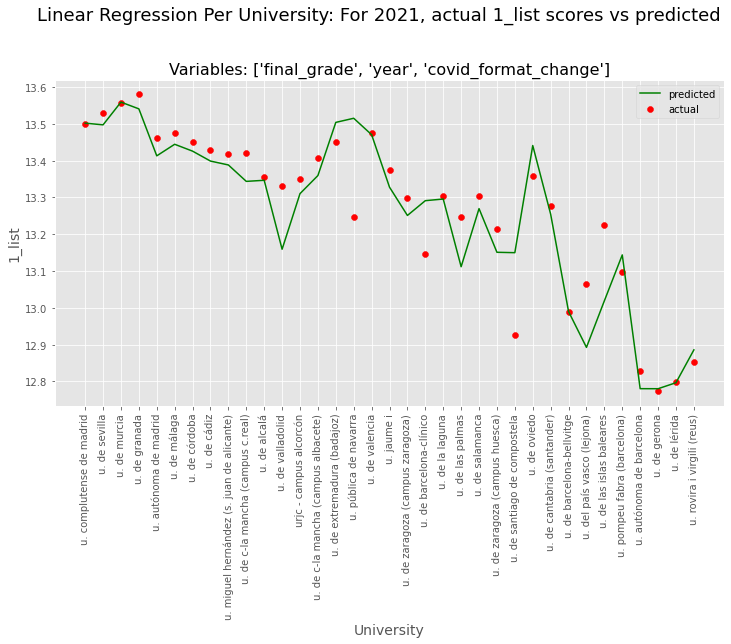

In [90]:
# using "final_grade", "year" and "covid_format_change" variables

X_var = ['final_grade', 'year', 'covid_format_change']

for uni in list_of_uni_names_2021:
    linear_regression_per_uni(X_var, 'linear_regression_per_uni_final_grade_year_covid')

y_test = results_models_per_uni['y_test']
y_predict = results_models_per_uni['y_predict']

plot_actual_vs_predicted('Linear Regression Per University: For 2021, actual 1_list scores vs predicted', f'Variables: {X_var}', y_test, y_predict)

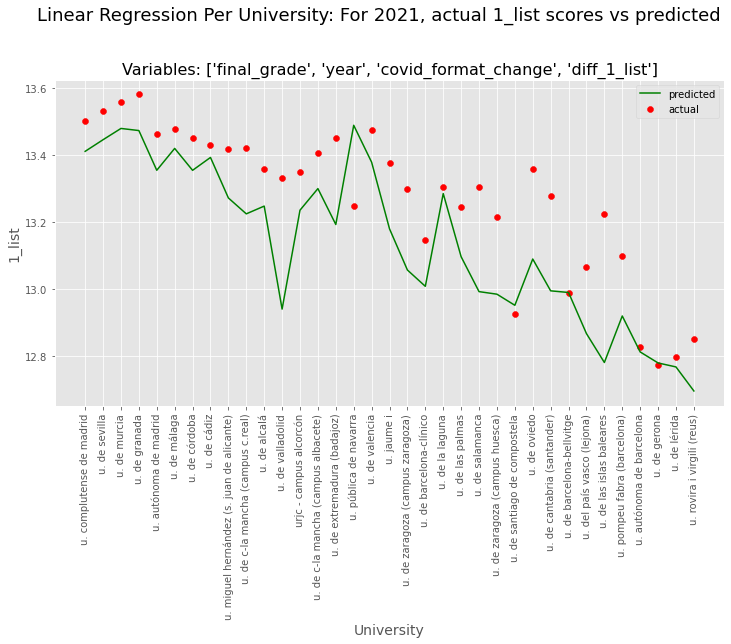

In [91]:
# using "final_grade", "year", "covid_format_change" and "diff_1_list"  variables

X_var = ['final_grade', 'year', 'covid_format_change', 'diff_1_list']

for uni in list_of_uni_names_2021:
    linear_regression_per_uni(X_var, 'linear_regression_per_uni_final_grade_year_covid_diff_1_list')

y_test = results_models_per_uni['y_test']
y_predict = results_models_per_uni['y_predict']

plot_actual_vs_predicted('Linear Regression Per University: For 2021, actual 1_list scores vs predicted', f'Variables: {X_var}', y_test, y_predict)

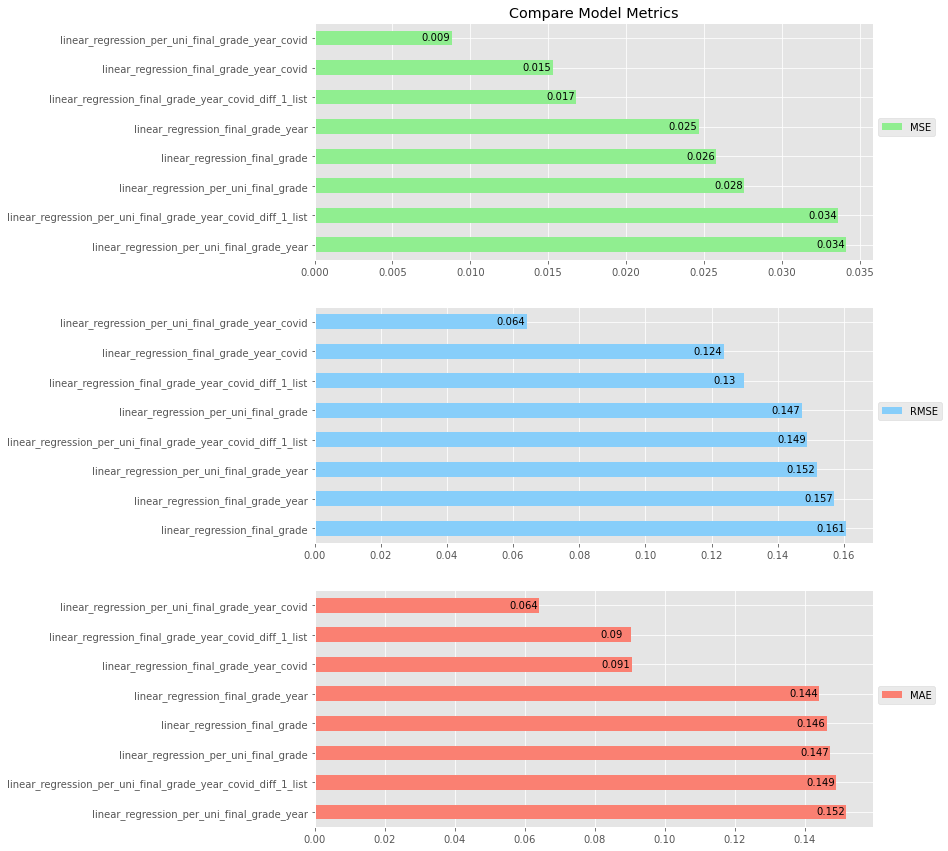

In [92]:
plot_metrics()

In [93]:
# given that the metrics are quite below the mean score of the variable we are predicting, we can consider the models are efficient

dfs_unified['1_list'].mean()

12.65742385786802

### ARIMA per University

In [94]:
#!pip install pmdarima --upgrade
#!pip install statsmodels==0.11.0rc1

In [95]:
from statsmodels.tsa.stattools import adfuller
#import pandas.util.testing as tm

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print('1. ADF: ', dftest[0])
    print('2. P-Value: ', dftest[1])
    print('3. Num Of Lags: ', dftest[2])
    print('4. Num Of Observations Used For ADF Regression and Critical Values Calculation: ', dftest[3])
    print('5. Critical Values: ')
    for key, val in dftest[4].items():
        print('\t', key, ': ', val)


In [ ]:
ad_test(dfs_unified['1_list'])

In [96]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [97]:
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.arima.model import ARIMA

In [98]:
# split data in train and test
university = 'u. complutense de madrid'
train = dfs_unified[(dfs_unified['university'] == university) & (dfs_unified['year'] != 2021)][['1_list']]
test = dfs_unified[(dfs_unified['university'] == university) & (dfs_unified['year'] == 2021)][['1_list']]

#print(dfs_unified.shape)
print(train.shape, test.shape)

(11, 1) (1, 1)


In [99]:
dfs_unified[(dfs_unified['university'] == university)]

,year,university,1_list,final_grade,since_2010,city,CCAA,covid_format_change,diff_1_list,diff_final_grade,diff_1_list_final_grade,latitude,longitude
29,2010,u. complutense de madrid,12.189,12.022,True,madrid,C. Madrid,0.0,0.000,0.000,0.167,40.44374,-3.726146
30,2011,u. complutense de madrid,12.469,12.354,True,madrid,C. Madrid,0.0,0.280,0.332,0.115,40.44374,-3.726146
31,2012,u. complutense de madrid,12.499,12.499,True,madrid,C. Madrid,0.0,0.030,0.145,0.000,40.44374,-3.726146
29,2013,u. complutense de madrid,12.571,12.435,True,madrid,C. Madrid,0.0,0.072,-0.064,0.136,40.44374,-3.726146
30,2014,u. complutense de madrid,12.617,12.615,True,madrid,C. Madrid,0.0,0.046,0.180,0.002,40.44374,-3.726146
30,2015,u. complutense de madrid,12.697,12.697,True,madrid,C. Madrid,0.0,0.080,0.082,0.000,40.44374,-3.726146
24,2016,u. complutense de madrid,12.742,12.599,True,madrid,C. Madrid,0.0,0.045,-0.098,0.143,40.44374,-3.726146
31,2017,u. complutense de madrid,12.871,12.871,True,madrid,C. Madrid,0.0,0.129,0.272,0.000,40.44374,-3.726146
32,2018,u. complutense de madrid,12.966,12.966,True,madrid,C. Madrid,0.0,0.095,0.095,0.000,40.44374,-3.726146
32,2019,u. complutense de madrid,13.044,13.044,True,madrid,C. Madrid,0.0,0.078,0.078,0.000,40.44374,-3.726146


In [100]:
def ARIMACheck(university):
    from pmdarima import auto_arima  

    stepwise_fit = auto_arima(dfs_unified[dfs_unified['university'] == university]['1_list'], trace=True, suppress_warnings=True)
    #print(stepwise_fit.summary())
    return stepwise_fit

In [101]:
stepwise_fit = ARIMACheck(university)
stepwise_fit

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15.292, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13.626, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13.609, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7.656, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.235 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [102]:
stepwise_fit.get_params().get('order')

(0, 1, 0)

In [103]:
model = ARIMA(train, order=stepwise_fit.get_params().get('order'))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 1_list   No. Observations:                   11
Model:                 ARIMA(0, 1, 0)   Log Likelihood                   4.073
Date:                Mon, 23 May 2022   AIC                             -6.146
Time:                        18:22:42   BIC                             -5.843
Sample:                             0   HQIC                            -6.478
                                 - 11                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0259      0.010      2.548      0.011       0.006       0.046
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.30
Prob(Q):                              0.74   Prob(JB):                         0.19
Heteroskedasticity (H):               1.75   Skew:                             1.39
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
# prediction for test set (2021 scores)
start = len(train)
end = len(train) + len(test)-1
y_predict = model.predict(start=start, end=end, typ='levels')
y_predict.index = dfs_unified[(dfs_unified['university'] == university) & (dfs_unified['year'] == 2021)]['university']
y_predict_df = y_predict.reset_index()
y_predict_df['1_list'] = ''
y_predict_df['1_list'] = y_predict_df[0]
y_predict_df = y_predict_df.drop(0, 1)
y_predict_df

,university,1_list
0,u. complutense de madrid,13.408


In [105]:
test['1_list'].values[0]

13.5

In [106]:
train['1_list'].values[0]

12.189

In [107]:
y_predict.values[0]

13.408

In [108]:
# evaluate models per university
arima_results_models_per_uni = pd.DataFrame(columns=['university','MSE', 'RMSE', 'MAE', 'y_predict', 'y_test'])
arima_results_models_per_uni['university'] = list_of_uni_names_2021

In [109]:
def ARIMA_per_uni(model_name_variables):
    from statsmodels.tsa.arima.model import ARIMA
    
    # split data in train and test
    train = dfs_unified[(dfs_unified['university'] == uni) & (dfs_unified['year'] != 2021)][['1_list']]
    test = dfs_unified[(dfs_unified['university'] == uni) & (dfs_unified['year'] == 2021)][['1_list']]

    stepwise_fit = ARIMACheck(uni)

    model = ARIMA(train, order=stepwise_fit.get_params().get('order'))
    model = model.fit()
    
    # prediction for test set (2021 scores)
    start = len(train)
    end = len(train) + len(test)-1
    y_predict = model.predict(start=start, end=end, typ='levels')
    # y_predict.index = dfs_unified[(dfs_unified['university'] == university) & (dfs_unified['year'] == 2021)]['university']
    # y_predict_df['university'] = np.where(y_predict_df['university'] == university, university, y_predict_df['university'])
    # y_predict_df['1_list'] = np.where(y_predict_df['university'] == university, pred.mean(), y_predict_df['1_list'])
    
    y_predict = y_predict.values[0]
    y_test = test['1_list'].values[0]

    # evaluation
    errors = y_test - y_predict

    # MSE (min squared error)
    mse = np.mean(errors ** 2)

    # RMSE (root min squared error)
    rmse = np.sqrt(mse)

    # MAE (mean absolute error)
    mae = np.mean(np.abs(errors))
    
    arima_results_models_per_uni['MSE'] = np.where(arima_results_models_per_uni['university'] == uni, mse, arima_results_models_per_uni['MSE'])
    arima_results_models_per_uni['RMSE'] = np.where(arima_results_models_per_uni['university'] == uni, rmse, arima_results_models_per_uni['RMSE'])
    arima_results_models_per_uni['MAE'] = np.where(arima_results_models_per_uni['university'] == uni, mae, arima_results_models_per_uni['MAE'])
    arima_results_models_per_uni['y_predict'] = np.where(arima_results_models_per_uni['university'] == uni, y_predict, arima_results_models_per_uni['y_predict'])
    arima_results_models_per_uni['y_test'] = np.where(arima_results_models_per_uni['university'] == uni, y_test, arima_results_models_per_uni['y_test'])

    # we do the average out of all of the universities, to compare against the other models
    results_models.loc[model_name_variables] = [model_name_variables, arima_results_models_per_uni['MSE'].mean(), arima_results_models_per_uni['RMSE'].mean(), arima_results_models_per_uni['MAE'].mean()]

In [110]:
#list_of_uni_names_2021

In [111]:
#!pip install statsmodels --upgrade

In [112]:
for uni in list_of_uni_names_2021:
    print(uni)
    try:
        ARIMA_per_uni('ARIMA_per_uni')
    except:
        pass

u. complutense de madrid
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15.292, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13.626, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13.609, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7.656, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.260 seconds
u. de sevilla
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15.765, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13.165, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11.191, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11.231, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7.197, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercep

In [113]:
arima_results_models_per_uni

,university,MSE,RMSE,MAE,y_predict,y_test
0,u. complutense de madrid,0.008464,0.092,0.092,13.408,13.5
1,u. de sevilla,0.058515,0.241899,0.241899,13.771899,13.53
2,u. de murcia,0.013456,0.116,0.116,13.442,13.558
3,u. de granada,0.0064,0.08,0.08,13.5,13.58
4,u. autónoma de madrid,0.000005,0.002155,0.002155,13.465155,13.463
5,u. de málaga,0.008836,0.094,0.094,13.382,13.476
6,u. de córdoba,0.009025,0.095,0.095,13.355,13.45
7,u. de cádiz,0.014161,0.119,0.119,13.311,13.43
8,u. miguel hernández (s. juan de alicante),0.0121,0.11,0.11,13.309,13.419
9,u. de c-la mancha (campus c.real),0.0196,0.14,0.14,13.281,13.421


In [114]:
dfs_unified[(dfs_unified['university'] == 'u. de barcelona-bellvitge') & (dfs_unified['year'] != 2021)][['1_list']].mean()

1_list    12.99
dtype: float64

In [115]:
# for u. de barcelona-bellvitge we only have data since 2020, therefore we get an error when trying to calculate the scores
# for this purpose let's predict there is no growth (same score for 2021 as 2020)

uni = 'u. de barcelona-bellvitge'
y_predict = dfs_unified[(dfs_unified['university'] == uni) & (dfs_unified['year'] != 2021)][['1_list']].mean()
y_test = dfs_unified[(dfs_unified['university'] == uni) & (dfs_unified['year'] == 2021)][['1_list']].mean()

# evaluation
errors = y_test - y_predict

# MSE (min squared error)
mse = np.mean(errors ** 2)

# RMSE (root min squared error)
rmse = np.sqrt(mse)

# MAE (mean absolute error)
mae = np.mean(np.abs(errors))
    
arima_results_models_per_uni['MSE'] = np.where(arima_results_models_per_uni['university'] == uni, mse, arima_results_models_per_uni['MSE'])
arima_results_models_per_uni['RMSE'] = np.where(arima_results_models_per_uni['university'] == uni, rmse, arima_results_models_per_uni['RMSE'])
arima_results_models_per_uni['MAE'] = np.where(arima_results_models_per_uni['university'] == uni, mae, arima_results_models_per_uni['MAE'])
arima_results_models_per_uni['y_predict'] = np.where(arima_results_models_per_uni['university'] == uni, y_predict, arima_results_models_per_uni['y_predict'])
arima_results_models_per_uni['y_test'] = np.where(arima_results_models_per_uni['university'] == uni, y_test, arima_results_models_per_uni['y_test'])

    # we do the average out of all of the universities, to compare against the other models
results_models.loc['ARIMA_per_uni'] = ['ARIMA_per_uni', arima_results_models_per_uni['MSE'].mean(), arima_results_models_per_uni['RMSE'].mean(), arima_results_models_per_uni['MAE'].mean()]

In [116]:
arima_results_models_per_uni

,university,MSE,RMSE,MAE,y_predict,y_test
0,u. complutense de madrid,0.008464,0.092,0.092,13.408,13.5
1,u. de sevilla,0.058515,0.241899,0.241899,13.771899,13.53
2,u. de murcia,0.013456,0.116,0.116,13.442,13.558
3,u. de granada,0.0064,0.08,0.08,13.5,13.58
4,u. autónoma de madrid,0.000005,0.002155,0.002155,13.465155,13.463
5,u. de málaga,0.008836,0.094,0.094,13.382,13.476
6,u. de córdoba,0.009025,0.095,0.095,13.355,13.45
7,u. de cádiz,0.014161,0.119,0.119,13.311,13.43
8,u. miguel hernández (s. juan de alicante),0.0121,0.11,0.11,13.309,13.419
9,u. de c-la mancha (campus c.real),0.0196,0.14,0.14,13.281,13.421


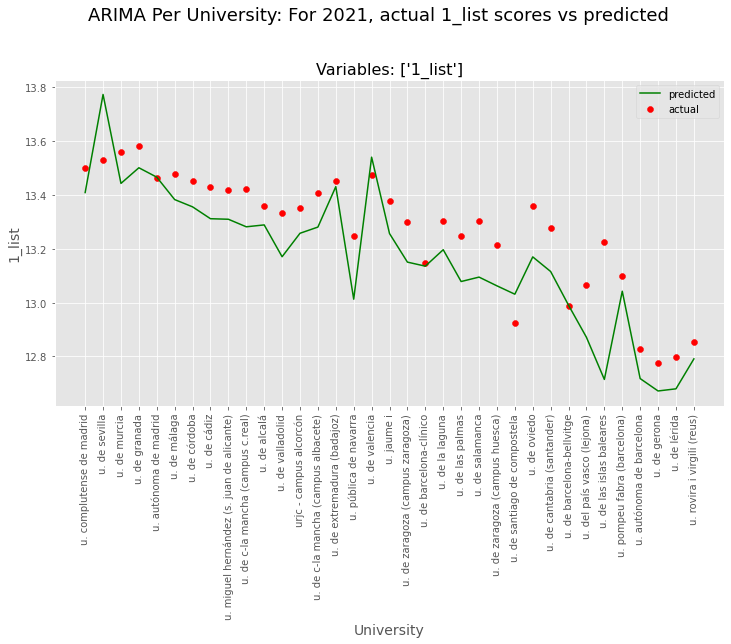

In [117]:
X_var = ['1_list']
plot_actual_vs_predicted('ARIMA Per University: For 2021, actual 1_list scores vs predicted', f'Variables: {X_var}', arima_results_models_per_uni['y_test'], arima_results_models_per_uni['y_predict'])

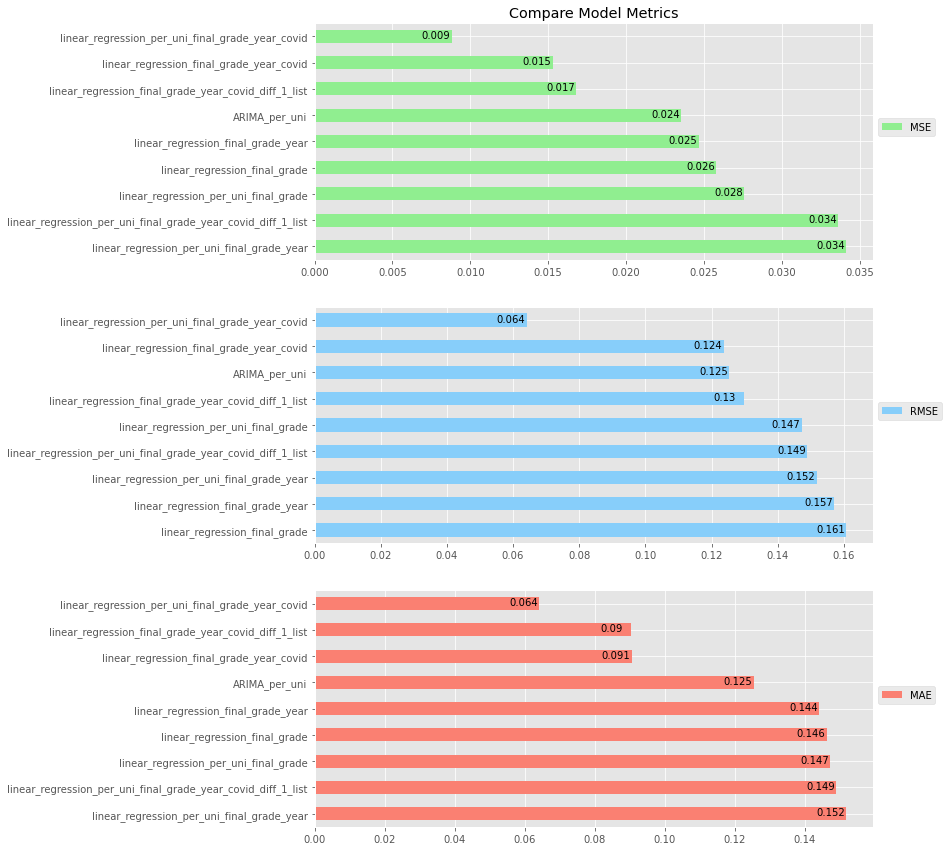

In [118]:
plot_metrics()

## Predict 2022 1_list scores

Given the metrics results shown above, we will use the Linear Regression per University models with the variables: "final_grade", "year" and "covid_format_change" to predict the scores for 2022

In [119]:
# now that we now the model is good, we retrain the model on the entire dataset (not only the train section)

In [120]:
dfs_unified[dfs_unified['university'] == 'u. complutense de madrid']

,year,university,1_list,final_grade,since_2010,city,CCAA,covid_format_change,diff_1_list,diff_final_grade,diff_1_list_final_grade,latitude,longitude
29,2010,u. complutense de madrid,12.189,12.022,True,madrid,C. Madrid,0.0,0.000,0.000,0.167,40.44374,-3.726146
30,2011,u. complutense de madrid,12.469,12.354,True,madrid,C. Madrid,0.0,0.280,0.332,0.115,40.44374,-3.726146
31,2012,u. complutense de madrid,12.499,12.499,True,madrid,C. Madrid,0.0,0.030,0.145,0.000,40.44374,-3.726146
29,2013,u. complutense de madrid,12.571,12.435,True,madrid,C. Madrid,0.0,0.072,-0.064,0.136,40.44374,-3.726146
30,2014,u. complutense de madrid,12.617,12.615,True,madrid,C. Madrid,0.0,0.046,0.180,0.002,40.44374,-3.726146
30,2015,u. complutense de madrid,12.697,12.697,True,madrid,C. Madrid,0.0,0.080,0.082,0.000,40.44374,-3.726146
24,2016,u. complutense de madrid,12.742,12.599,True,madrid,C. Madrid,0.0,0.045,-0.098,0.143,40.44374,-3.726146
31,2017,u. complutense de madrid,12.871,12.871,True,madrid,C. Madrid,0.0,0.129,0.272,0.000,40.44374,-3.726146
32,2018,u. complutense de madrid,12.966,12.966,True,madrid,C. Madrid,0.0,0.095,0.095,0.000,40.44374,-3.726146
32,2019,u. complutense de madrid,13.044,13.044,True,madrid,C. Madrid,0.0,0.078,0.078,0.000,40.44374,-3.726146


In [121]:
dfs_unified[dfs_unified['university'] == 'u. complutense de madrid']['final_grade'][-1:].mean() + dfs_unified[dfs_unified['university'] == 'u. complutense de madrid']['diff_final_grade'][-1:].mean()

13.548

In [122]:
pred_y_df = pd.DataFrame(columns=['year', 'university', '1_list'])
pred_y_df['university'] = list_of_uni_names_2021


In [123]:
def predict_and_save_scores(year, covid_format_change, university):
    '''
    explicar
    '''
    lr = LinearRegression()
    X = dfs_unified[dfs_unified['university'] == university][['final_grade', 'year', 'covid_format_change']]
    y = dfs_unified[dfs_unified['university'] == university][['1_list']]

    # train
    lr.fit(X, y)
    
    # predict, supposing final_grade as previous year's final_grade

    final_grade = dfs_unified[dfs_unified['university'] == university]['final_grade'][-1:].mean()
    #final_grade = dfs_unified[dfs_unified['university'] == university]['final_grade'][-1:].mean() + dfs_unified[dfs_unified['university'] == university]['diff_final_grade'][-1:].mean()
    
    pred_y_df['1_list'] = np.where(pred_y_df['university'] == university, float(lr.predict([[final_grade, year, covid_format_change]])), pred_y_df['1_list'])

In [124]:
for uni in list_of_uni_names_2021:
    predict_and_save_scores(2022, 1.0, uni)

In [125]:
# problema: 1_list no puede ser menor que final_grade | lo calculamos sin utilizar el modelo, cogemos el decrecimiento del último año y se lo restamos a 1_list predicted
pred_y_df['final_grade'] = ''

for uni in list_of_uni_names_2021:
    pred_y_df['final_grade'] = np.where(pred_y_df['university'] == uni, pred_y_df['1_list'] - dfs_unified[dfs_unified['university'] == uni]['diff_1_list_final_grade'][-1:].mean(), pred_y_df['final_grade'])

In [126]:
pred_y_df['year'] = 2022

In [127]:
pred_y_df

,year,university,1_list,final_grade
0,2022,u. complutense de madrid,13.540313,13.466313
1,2022,u. de sevilla,13.551518,13.366518
2,2022,u. de murcia,13.569886,13.356886
3,2022,u. de granada,13.57721,13.31621
4,2022,u. autónoma de madrid,13.466246,13.312246
5,2022,u. de málaga,13.47809,13.27709
6,2022,u. de córdoba,13.469973,13.269973
7,2022,u. de cádiz,13.452672,13.254672
8,2022,u. miguel hernández (s. juan de alicante),13.43094,13.16194
9,2022,u. de c-la mancha (campus c.real),13.436239,13.161239


In [128]:
# append predicted scores to dfs_unified

dfs_unified = dfs_unified.append(pred_y_df)

In [129]:
dfs_unified

,year,university,1_list,final_grade,since_2010,city,CCAA,covid_format_change,diff_1_list,diff_final_grade,diff_1_list_final_grade,latitude,longitude
0,2010,u. de lérida,11.654,11.04,True,lérida,Cataluña,0.0,0.0,0.0,0.614,41.816361,1.597137
1,2010,u. de gerona,11.61,11.07,True,gerona,Cataluña,0.0,0.0,0.0,0.540,41.974379,2.823543
2,2010,u. rovira i virgili (reus),11.708,11.142,True,reus,Cataluña,0.0,0.0,0.0,0.566,41.155309,1.105327
3,2010,u. de zaragoza (campus huesca),12.059,11.19,True,huesca,Aragón,0.0,0.0,0.0,0.869,42.141406,-0.406090
4,2010,u. autónoma de barcelona,11.59,11.195,True,barcelona,Cataluña,0.0,0.0,0.0,0.395,41.502593,2.080056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,2022,u. pompeu fabra (barcelona),13.174329,12.834329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,2022,u. autónoma de barcelona,12.804136,12.727136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,2022,u. de gerona,12.783829,12.726829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,2022,u. de lérida,12.81147,12.72347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# apply created columns to predicted data (2022)
since_2010()
city()
CCAA()
covid_format_change()
diff_between_years('diff_1_list', '1_list')
diff_between_years('diff_final_grade', 'final_grade')
diff_1_list_final_grade()
round_to_3()
latitude()
longitude()

In [131]:
dfs_unified[dfs_unified['year'] == 2022]

,year,university,1_list,final_grade,since_2010,city,CCAA,covid_format_change,diff_1_list,diff_final_grade,diff_1_list_final_grade,latitude,longitude
0,2022,u. complutense de madrid,13.540,13.466,True,madrid,C. Madrid,1.0,0.040,0.040,0.074,40.44374,-3.726146
1,2022,u. de sevilla,13.552,13.367,True,sevilla,Andalucía,1.0,0.022,0.022,0.185,37.412856,-5.984561
2,2022,u. de murcia,13.570,13.357,True,murcia,Murcia,1.0,0.012,0.012,0.213,37.991092,-1.130104
3,2022,u. de granada,13.577,13.316,True,granada,Andalucía,1.0,-0.003,-0.003,0.261,37.147441,-3.604235
4,2022,u. autónoma de madrid,13.466,13.312,True,madrid,C. Madrid,1.0,0.003,0.003,0.154,40.483226,-3.697226
5,2022,u. de málaga,13.478,13.277,True,málaga,Andalucía,1.0,0.002,0.002,0.201,36.720043,-4.416179
6,2022,u. de córdoba,13.470,13.270,True,córdoba,Andalucía,1.0,0.020,0.020,0.200,37.856042,-4.813445
7,2022,u. de cádiz,13.453,13.255,True,cádiz,Andalucía,1.0,0.023,0.023,0.198,36.53402,-6.301899
8,2022,u. miguel hernández (s. juan de alicante),13.431,13.162,True,alicante,C. Valenciana,1.0,0.012,0.012,0.269,38.398963,-0.434778
9,2022,u. de c-la mancha (campus c.real),13.436,13.161,True,ciudad real,Castilla-La Mancha,1.0,0.015,0.015,0.275,38.991837,-3.926826


# Data Visualization

In [132]:
# compare growth of all years except for 2020, and 2020
# grouped_year_1_list = dfs_unified.groupby('year')['growth_1_list'].mean().reset_index()
# grouped_year_1_list_not_2020 = grouped_year_1_list[grouped_year_1_list['year'] != 2020]
# grouped_year_1_list_2020 = grouped_year_1_list[grouped_year_1_list['year'] == 2020]
# print(grouped_year_1_list_not_2020['growth_1_list'].mean())
# print(grouped_year_1_list_2020['growth_1_list'].mean())
# print(grouped_year_1_list_2020['growth_1_list'].mean() / grouped_year_1_list_not_2020['growth_1_list'].mean())

# Export data

In [133]:
import os
os.getcwd()

'/Users/miguel/repos/Prediction_Medicine_Selectivity_Scores'

In [134]:
# export data to be used on streamlit

file_name = 'output/exported_data_notebook.csv'
dfs_unified.to_csv(file_name, index = False, header=True)

In [135]:
dfs_unified.notnull()

,year,university,1_list,final_grade,since_2010,city,CCAA,covid_format_change,diff_1_list,diff_final_grade,diff_1_list_final_grade,latitude,longitude
0,True,True,True,True,True,True,True,True,False,False,True,True,True
1,True,True,True,True,True,True,True,True,False,False,True,True,True
2,True,True,True,True,True,True,True,True,False,False,True,True,True
3,True,True,True,True,True,True,True,True,False,False,True,True,True
4,True,True,True,True,True,True,True,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,True,True,True,True,True,True,True,True,True,True,True,True,True
31,True,True,True,True,True,True,True,True,True,True,True,True,True
32,True,True,True,True,True,True,True,True,True,True,True,True,True
33,True,True,True,True,True,True,True,True,True,True,True,True,True


In [136]:
dfs_unified[dfs_unified.isnull()]


,year,university,1_list,final_grade,since_2010,city,CCAA,covid_format_change,diff_1_list,diff_final_grade,diff_1_list_final_grade,latitude,longitude
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
dfs_unified[dfs_unified['university'] == '']

,year,university,1_list,final_grade,since_2010,city,CCAA,covid_format_change,diff_1_list,diff_final_grade,diff_1_list_final_grade,latitude,longitude


# Run Front-end / Streamlit visualization (myapp.py)

In [138]:
# execute cell below

In [139]:
#!pip install streamlit
#!streamlit run /Users/miguel/repos/Prediction_Medicine_Selectivity_Scores/streamlit/myapp.py